Telecom users dataset8

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("E:/Medium/2 Learned/Telecom users dataset/telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


No missing values, lets see if any of the data is duplicated

In [3]:
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

No data seems to be duplicated either. I'm going to get rid of the customerID and Unnamed but I do want to see how correlated Unnamed is to Churn.

In [4]:
tf = df[['Unnamed: 0', 'Churn']]
tf = pd.get_dummies(tf, drop_first=True)
tf.corr()

,Unnamed: 0,Churn_Yes
Unnamed: 0,1.00000,0.00663
Churn_Yes,0.00663,1.00000


Clearly this Unnamed: 0 column has no significant relation with Churn so we can just drop it along with CustomerID

In [5]:
df = df.drop(['Unnamed: 0', 'customerID'], axis = 1)

looking at if there is a relationship between gender and those who renew their telecom contract.

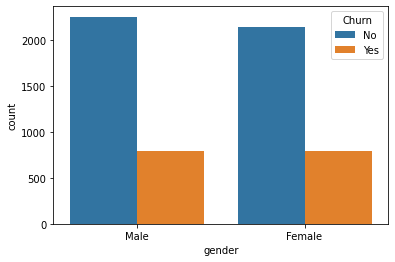

In [6]:
sns.countplot(data = df, x = 'gender', hue = 'Churn');

It seems males and females are just about as likely to choose to renew their telecom contract or not which means that gender is not going to be very correlated with Churn. There is also about an equal number of females and males in the dataset as well so this will help with the analysis.

Are Senior Citizens less likely to have a phone service? How about Device Protection?

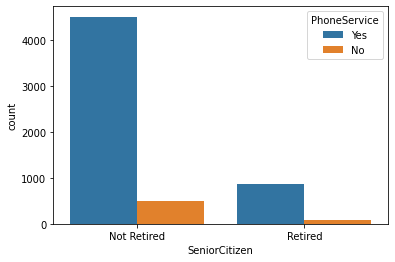

In [7]:
df_sen = df.copy()
df_sen['SeniorCitizen'] = df_sen['SeniorCitizen'].map({0:'Not Retired', 1:'Retired' })
sns.countplot(data = df_sen, x = 'SeniorCitizen', hue = 'PhoneService');

From this graph we can conclude that being a senior citizen has no significant impact on whether they have phone service or not

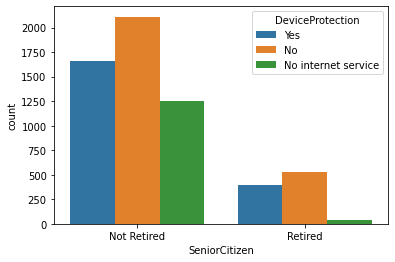

In [8]:
sns.countplot(data = df_sen, x = 'SeniorCitizen', hue = 'DeviceProtection', hue_order = ['Yes', 'No', 'No internet service']);

It seems most people do not have Device protection, but it has no correlation with whether someone is a senior citizen or not.

Does streaming TV's or Movies have a correlation with each other and does having one (or both) make it more likely that they would renew their telecom contract?

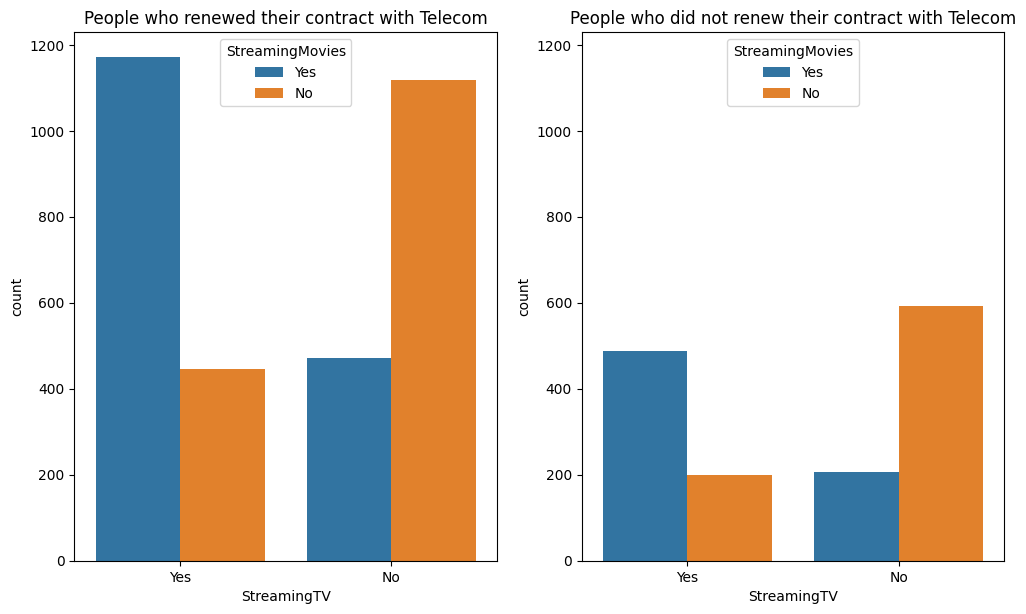

In [9]:
tf = df.sort_values(by = 'StreamingTV', ascending=False)
tf = tf[(tf['StreamingTV'] != 'No internet service') & (tf['StreamingMovies'] != 'No internet Service')]
tf_1 = tf[(tf['Churn'] == 'Yes')]
tf_2 = tf[tf['Churn'] == 'No']
fig, axes = plt.subplots(ncols=2, figsize = (12,7), dpi = 100, sharey = True)
axes[0].set_title("People who renewed their contract with Telecom");
axes[0].tick_params(labelleft = True)
sns.countplot(data = tf_2, x = 'StreamingTV', hue = 'StreamingMovies', hue_order = ['Yes', 'No'], ax = axes[0])
sns.countplot(data = tf_1, x = 'StreamingTV', hue = 'StreamingMovies', hue_order = ['Yes', 'No'],  ax = axes[1])
axes[1].set_title("People who did not renew their contract with Telecom");
axes[1].legend(loc = 'upper center', title = 'StreamingMovies')
axes[1].tick_params(labelleft = True)

We can see an obvious correlation between StreamingTV and StreamingMovies, however it doesn't seem like a group is significantly more likely to renew their contract even if they stream TV and/or Movies.

Do people who Protect their device have a higher chance of renewing the telecom contract?

In [10]:
secured = df[['OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'Churn']]
secured = secured[secured['OnlineBackup'] != 'No internet service'] #Going to get rid of No internet Service because they obviously would not have any of these protections
secured.head()

,OnlineSecurity,DeviceProtection,OnlineBackup,Churn
1,No,Yes,Yes,No
2,No,No,No,Yes
3,No,No,No,No
4,Yes,Yes,No,No
5,Yes,Yes,No,No


 lets see the correlation between the security measures. If someone has one security feature, are they more likely to have the others as well?

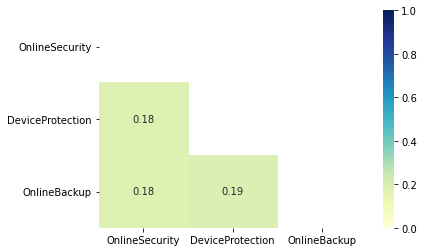

In [11]:
secured_corr = secured.copy()
for i in secured_corr.columns[:-1]:
    secured_corr[i] = secured_corr[i].map({'Yes':1, 'No':0, 'No internet service':0})
mask = np.zeros_like(secured_corr.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(secured_corr.corr(), annot = True, cmap="YlGnBu", mask = mask, vmin = 0, vmax = 1);


It doesn't seem like any of the securities are correlated with each other meaning that having one type of security like OnlineSecurity has almost no effect on whether someone will have another type of security like DeviceProtection


Does churn have a correlation with any of these security protections?

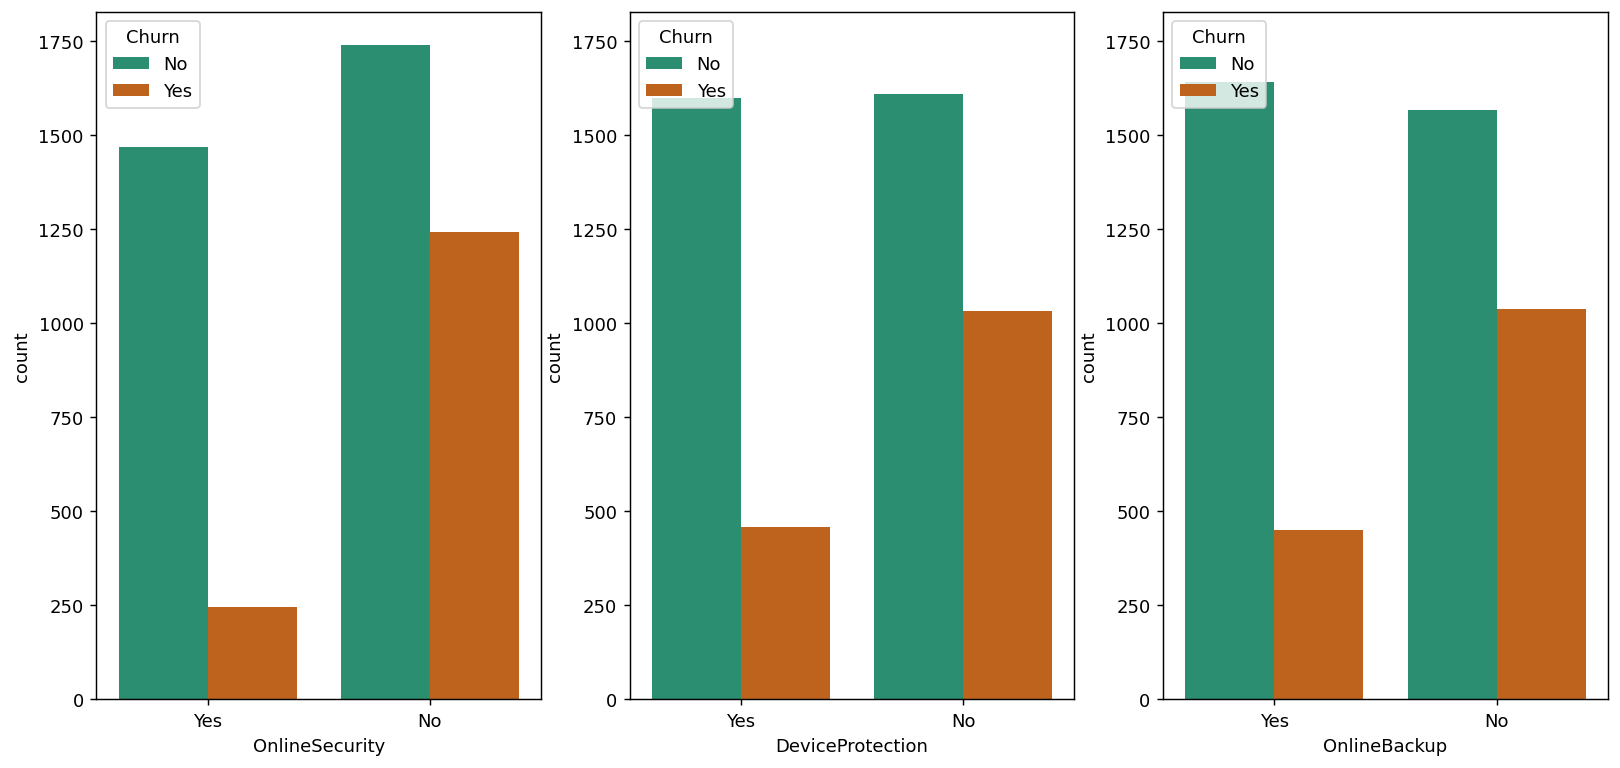

In [12]:
secured = secured.sort_values(by = 'OnlineSecurity', ascending=False)
fig, axes = plt.subplots(ncols = 3, dpi = 130, figsize = (15, 7), sharey=True)
j = 0
for i in secured.columns[:-1]:
    sns.countplot(data = secured.sort_values(by = i, ascending=False), x = i, hue = 'Churn', ax = axes[j], palette='Dark2', hue_order = ['No', 'Yes'])
    axes[j].legend(loc = 'upper left', title = 'Churn')
    axes[j].tick_params(labelleft = True)
    j+=1

There seems to be no significant correlation between the security someone has and them renewing their contract with Telecom. Security is not that helpful of a predictor when analyzing the churn.

Lets start analyzing how features like Tenure and Total charges affect whether someone will renew their subscription or not

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df_t = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df_t.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,72,24.10,1734.65,No
1,44,88.15,3973.20,No
2,38,74.95,2869.85,Yes
3,4,55.90,238.50,No
4,2,53.45,119.50,No


Just something to point out, The 'TotalCharges' column is for some reason an object rather than an int and has 10 empty strings in it because tenure = 0 for those rows so make sure to get rid of empty strings and convert it to an int column before doing analysis

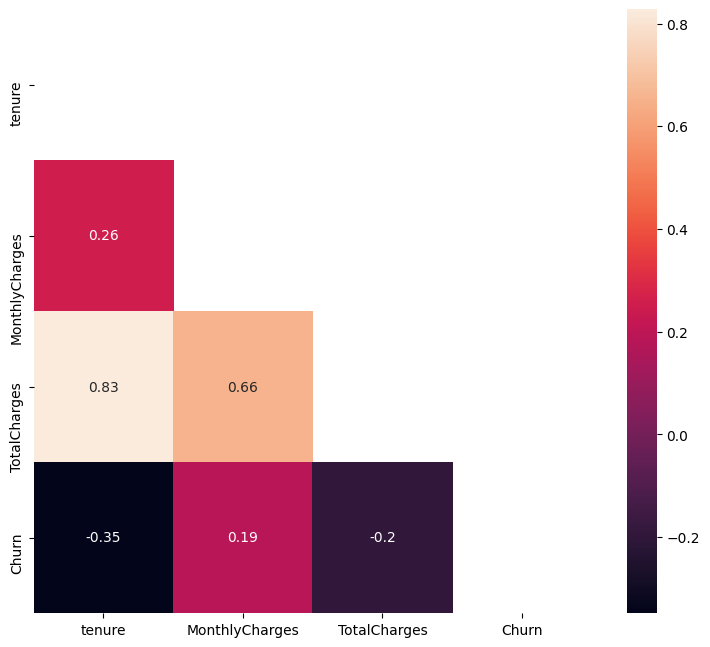

In [14]:
df_tcorr = df_t.copy()
df_tcorr['Churn'] = df_tcorr['Churn'].map({'No':0, 'Yes':1})
plt.figure(figsize=(9,8), dpi = 100)
mask = np.zeros_like(df_tcorr.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_tcorr.corr(), annot=True, mask = mask );


So there are some obvious correlations here. For example, if a person has a higher tenure (meaning they've been a client for longer), then they will have more total charges. Monthlym Charges is also clearly correlated with TotalCharges.

What's interesting though is that none of these columns are really that good at determining the churn. One would expect that if someone has been a client for a long time (tenure), they would stay a client, but that doesn't seem to be the case with a -35% correlation. Flipping a coin would be a better determination of if someone is staying or not. Same thing with montly and total charges, there seems to be very little correlation between them and churn which is, again, surprising because how much someone is being charged would seem like a great predictor of whether or not they will renew their subscription but it doesn't seem so.

Perhaps this correlation chart is not giving us the full picture, lets analyze the data a bit more.


In [15]:
#tenure - how many months a person has been a client of the company
#MonthlyCharges - current monthly payment
#TotalCharges - the total amount that the client paid for the services for the entire time

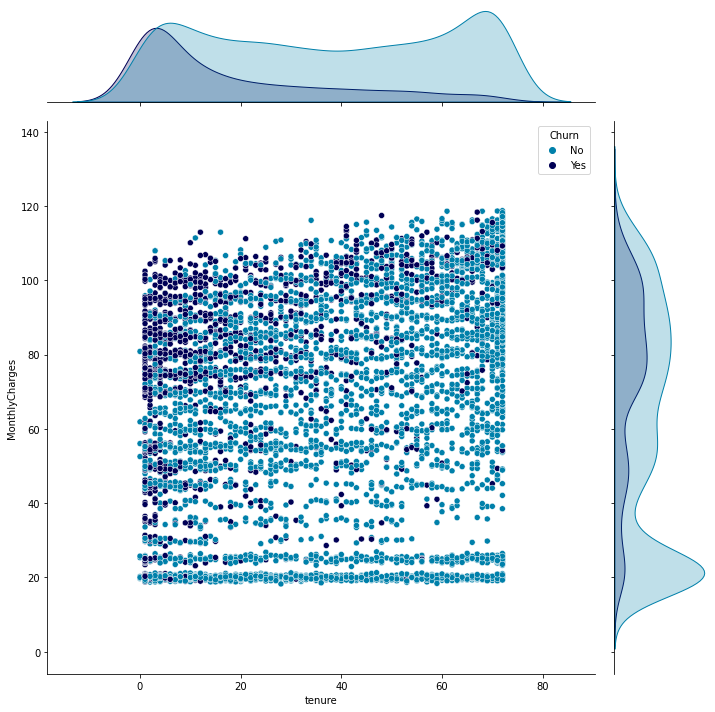

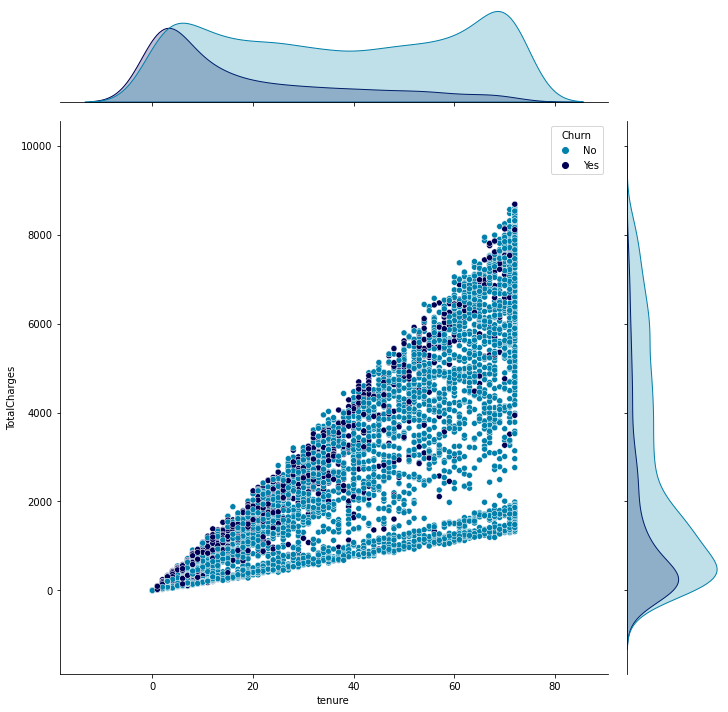

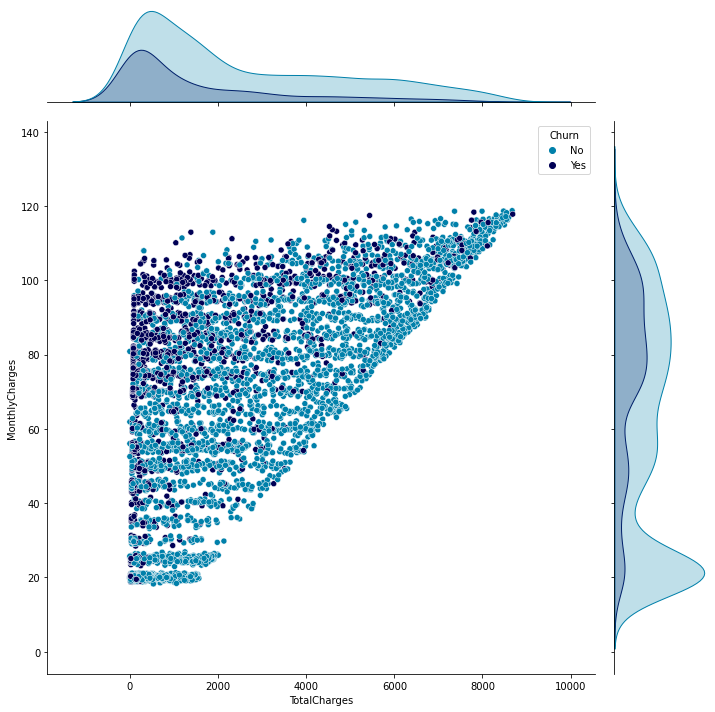

In [16]:
sns.jointplot(data = df_t, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', hue_order = ['No', 'Yes'], palette = 'ocean_r', height = 10);
sns.jointplot(data = df_t, x = 'tenure', y = 'TotalCharges', hue = 'Churn', hue_order = ['No', 'Yes'], palette = 'ocean_r', height = 10);
sns.jointplot(data = df_t, x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', hue_order = ['No', 'Yes'], palette = 'ocean_r', height = 10);


So it turns out that the pearson correlation does not do the features justice as we can clearly see a much clearer correlation with Churn now.

A significant feature is definetely tenure, people do seem more likely to renew their contracts if they've already been using the service for awhile, no matter how much they are paying or have paid in total.

If Total Charges or Monthly Charges are small, people are also much more likely to keept their contract with telecom.

An interesting thing to note here is that even if monthly charges are higher, people with a high tenure (have stayed with telecom for awhile) will most likely still renew their contract.


Lastly let's look at the contract that is signed and see if it is related to churn at all

In [17]:
df_part = df[['Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df_part.head()

,Contract,MonthlyCharges,TotalCharges,Churn
0,Two year,24.10,1734.65,No
1,Month-to-month,88.15,3973.20,No
2,Month-to-month,74.95,2869.85,Yes
3,Month-to-month,55.90,238.50,No
4,Month-to-month,53.45,119.50,No


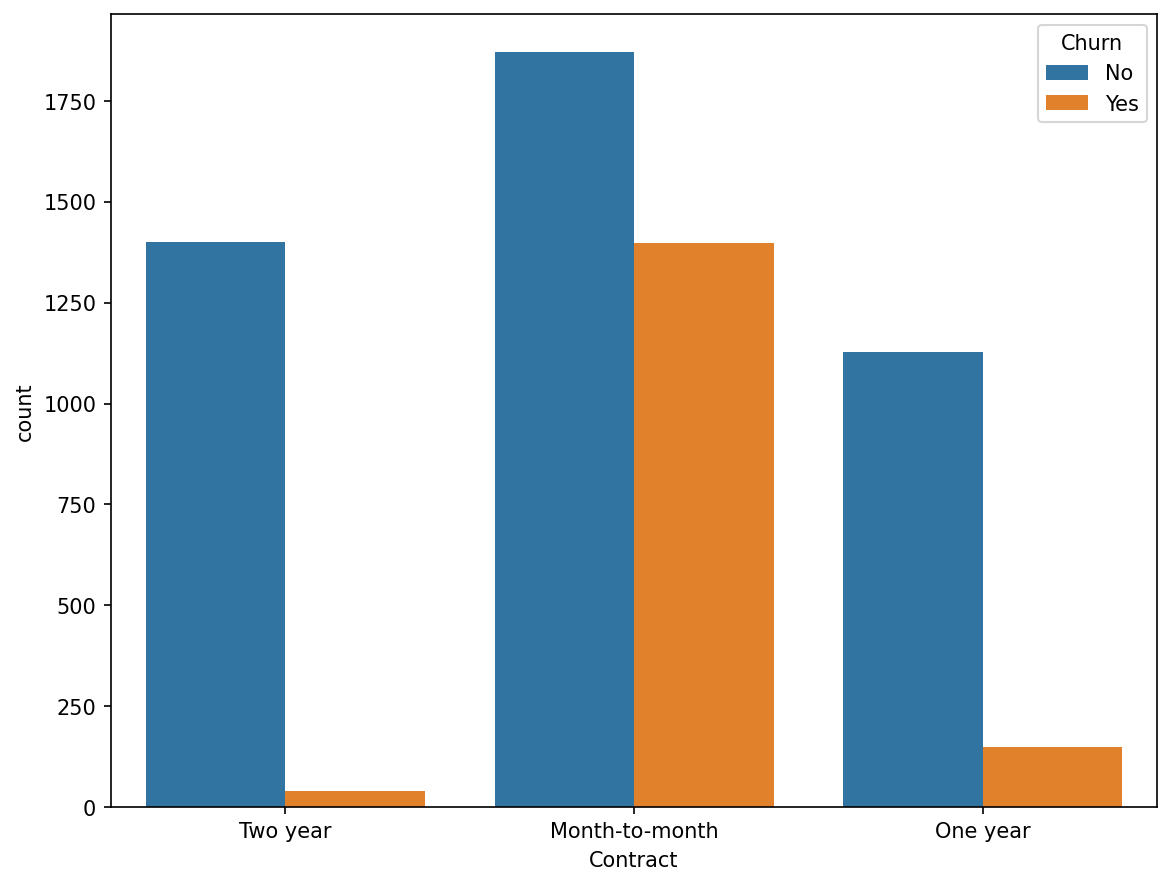

In [18]:
plt.figure(figsize = (9,7), dpi = 150)
sns.countplot(data = df_part, x = 'Contract', hue = 'Churn');


Well the type of Contract someone has with company seems to play a significant role in whether someone will renew their contract or not. Having a 2 year or 1 year contract means that people will most likely renew their contract while most people with a month to month contract tend to not renew their contracts.

But why is the contract so significant? Lets look at the total and monthly pay to see if they are perhaps paying more with a month to month contract.


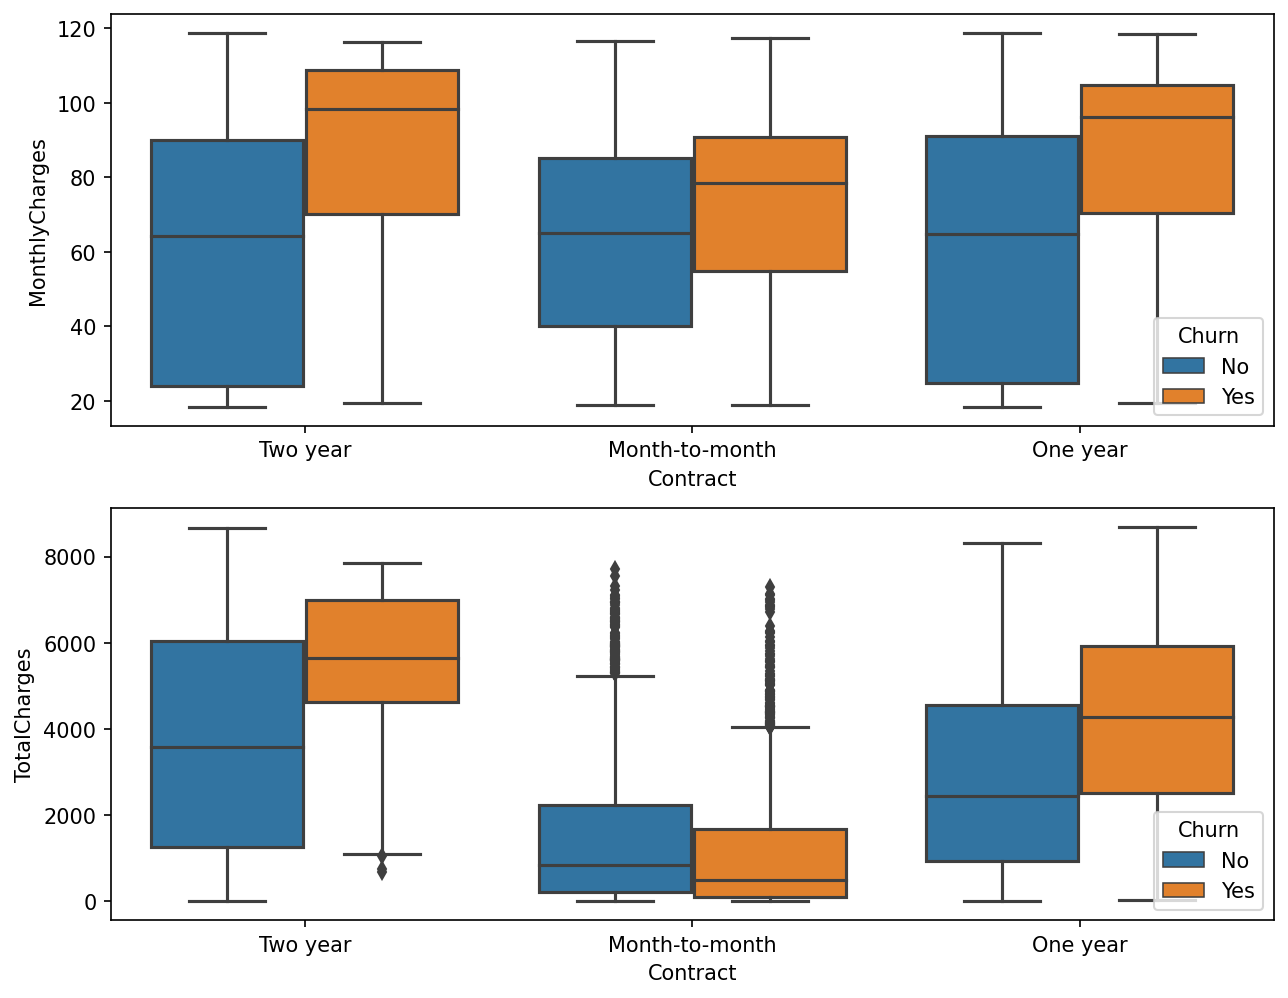

In [19]:
fig, ax = plt.subplots(figsize = (10, 8), dpi = 150, nrows = 2)
sns.boxplot(data = df_part, x = 'Contract', y = 'MonthlyCharges', hue = 'Churn', ax = ax[0]);
ax[0].legend(loc = 'lower right', title = 'Churn');
sns.boxplot(data = df_part, x = 'Contract', y = 'TotalCharges', hue = 'Churn', ax = ax[1]);
ax[1].legend(loc = 'lower right', title = 'Churn');


What's interesting to notice is that for two year and one year contracts, the median monthly payment can be fairly high (about 100) before people start becoming less likely to renew their contract, however, the month to month charge does not need to be as high before people stop renewing their contracts. In fact the median total charges for people who did not renew their month to month contract is actually smaller than the median total charges for people who did renew their month to month contract.

However, this still doesn't tell us why contract is such a good predictor of Churn. Lets do a correlation check with all the features and see which features are most related to 'Contract'.


In [20]:
t = pd.get_dummies(df.drop('Contract', axis = 1), drop_first=True)
t['Contract'] = df['Contract'].map({'Two year':2, 'Month-to-month':0, 'One year':1})
print("Features Correlated with 'Contract'")
t.corr()['Contract'][:-1]

Features Correlated with 'Contract'


SeniorCitizen                           -0.149406
tenure                                   0.671551
MonthlyCharges                          -0.068429
TotalCharges                             0.449090
gender_Male                             -0.001843
Partner_Yes                              0.300549
Dependents_Yes                           0.246163
PhoneService_Yes                         0.005267
MultipleLines_No phone service          -0.005267
MultipleLines_Yes                        0.110798
InternetService_Fiber optic             -0.250522
InternetService_No                       0.241541
OnlineSecurity_No internet service       0.241541
OnlineSecurity_Yes                       0.245927
OnlineBackup_No internet service         0.241541
OnlineBackup_Yes                         0.154533
DeviceProtection_No internet service     0.241541
DeviceProtection_Yes                     0.225410
TechSupport_No internet service          0.241541
TechSupport_Yes                          0.298368


Seems that tenure is most related to contract with a 67.16% correlation, both of which are most closely related to Churn as well. Lets see why they are so correlated with each others.

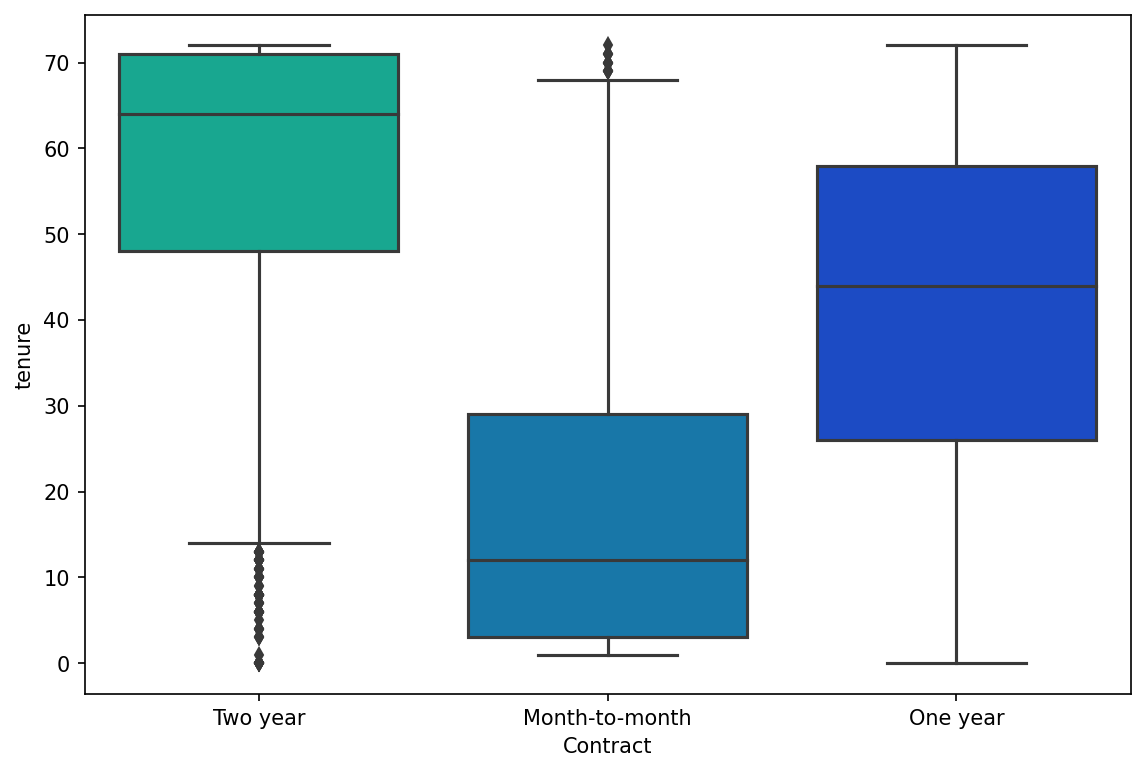

In [21]:
plt.figure(figsize = (9, 6), dpi = 150)
sns.boxplot(data = df, x = 'Contract', y = 'tenure', palette = 'winter_r');

When thinking about the 2 features, it makes sense why they're so highly correlated. If someone has a longer contract, they most likely are going to stay a client for a longer period of time. And as we've already seen, someone who has stayed as a client for awhile is more likely to renew their contract, so it makes sense why the contract is significantly correlated with Tenure and Churn.

I'm going to move on to finding the best model to predict Churn. Note that for most of these models I used GridSearchCV to find the best models but didn't use it in my answer because it would take awhile to run.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Logistic Regression

In [23]:
X_log = pd.get_dummies(df.drop('Churn', axis = 1), drop_first=True)
y_log = df['Churn']

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_log, y_log, test_size=0.25, random_state=42)

scale = StandardScaler()
X_train_l = scale.fit_transform(X_train_l)
X_test_l = scale.transform(X_test_l)

from sklearn.linear_model import LogisticRegression
#param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.1, 1, 10, 100], 'class_weight':['None', 'balanced'], 'solver':['saga'], 'l1_ratio':[0, 0.1, 0.5, 0.9, 1]}
lg = LogisticRegression(max_iter=1000, penalty = 'elasticnet', C = 0.1, l1_ratio = 0.9, solver = 'saga')
#grid_model_l = GridSearchCV(lg, param_grid)

In [24]:
#grid_model_l.fit(X_train_l, y_train_l)
lg.fit(X_train_l, y_train_l)
#grid_model_l.best_params_

LogisticRegression(C=0.1, l1_ratio=0.9, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [25]:
#y_pred_l = grid_model_l.predict(X_test_l)
y_pred_l = lg.predict(X_test_l)

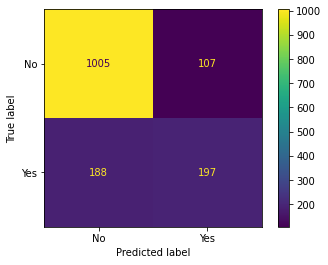

In [26]:
from sklearn.metrics import plot_confusion_matrix, classification_report
#plot_confusion_matrix(grid_model_l, X_test_l, y_test_l)
plot_confusion_matrix(lg, X_test_l, y_test_l);

In [27]:
print(classification_report(y_test_l, y_pred_l))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1112
         Yes       0.65      0.51      0.57       385

    accuracy                           0.80      1497
   macro avg       0.75      0.71      0.72      1497
weighted avg       0.79      0.80      0.79      1497



Logistic Regression was able to get an accuracy of around 80%. However, it has a hard time dealing with False Positives.

SVM model

In [28]:
from sklearn.svm import SVC
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_log, y_log, test_size=0.25, random_state=42)
scale_min = MinMaxScaler()
X_train_s = scale_min.fit_transform(X_train_s)
X_test_s = scale_min.transform(X_test_s)

#param_grid = {'C':[0.01, 0.1, 0.5, 0.9, 1], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2,3,4], 'gamma':['scale', 'auto'], 'class_weight':['None', 'balanced']}
sv = SVC(max_iter = 10000, C = 0.9, class_weight = 'balanced', kernel = 'poly', degree = 4, gamma = 'scale')
#grid_model_s = GridSearchCV(sv, param_grid)

In [29]:
#grid_model_s.fit(X_train_s, y_train_s)
#grid_model_s.best_params_
sv.fit(X_train_s, y_train_s)

SVC(C=0.9, class_weight='balanced', degree=4, kernel='poly', max_iter=10000)

In [30]:
#y_pred_s = grid_model_s.predict(X_test_l)
y_pred_s = sv.predict(X_test_l)

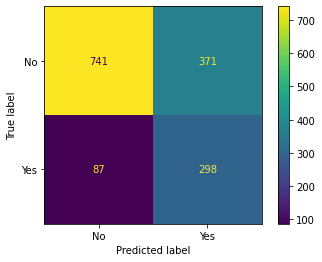

In [31]:
#plot_confusion_matrix(grid_model_s, X_test_s, y_test_s)
plot_confusion_matrix(sv, X_test_s, y_test_s);

In [32]:
print(classification_report(y_test_s, y_pred_s ))

              precision    recall  f1-score   support

          No       0.80      0.71      0.75      1112
         Yes       0.37      0.48      0.42       385

    accuracy                           0.66      1497
   macro avg       0.58      0.60      0.59      1497
weighted avg       0.69      0.66      0.67      1497



SVM's are less accurate then Logistic Regression with a 65% accuracy. However, there are significantly less false positives in the data, at the cost of having significantly more false negatives.

tree based methods

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_tree = df.drop('Churn', axis = 1)
X_tree = X_tree.apply(le.fit_transform)
y_tree = df['Churn']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tree, y_tree, test_size=0.25, random_state=42)

In [34]:
#param_grid = {'n_estimators':[100, 300, 500], 'criterion':['gini', 'entropy'], 'max_features':['auto', 'sqrt', 'log2'], 'bootstrap':[True, False]}
rfc = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_features = 'sqrt', n_estimators = 500)
#grid = GridSearchCV(rfc, param_grid)

In [35]:
#grid.fit(X_train_t, y_train_t)
#grid.best_params_
rfc.fit(X_train_t, y_train_t)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [36]:
#y_pred_t = grid.predict(X_test_t)
y_pred_t = rfc.predict(X_test_t)

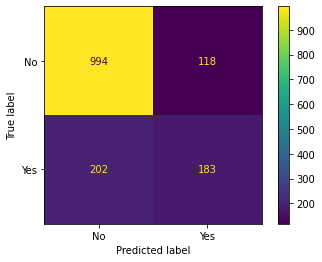

In [37]:
#plot_confusion_matrix(grid, X_test_t, y_test_t)
plot_confusion_matrix(rfc, X_test_t, y_test_t);

In [38]:
print(classification_report(y_test_t, y_pred_t))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1112
         Yes       0.61      0.48      0.53       385

    accuracy                           0.79      1497
   macro avg       0.72      0.68      0.70      1497
weighted avg       0.77      0.79      0.78      1497



Random Forest is about as accurate as Logistic Regression but has the same problem of having a high amount of false positives.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.009, loss = 'exponential', max_depth = 5, max_features = 'sqrt', n_estimators = 500)
#param_grid = {'loss':['deviance', 'exponential'], 'learning_rate':[0.01, 0.1, 0.5, 0.9], 'n_estimators':[100, 300, 500], 'max_features':['auto', 'sqrt', 'log2'], 'max_depth':[3,4,5,6]}
#grid = GridSearchCV(gbc, param_grid)

In [40]:
#grid.fit(X_train_t, y_train_t)
gbc.fit(X_train_t, y_train_t)
#grid.best_params_

GradientBoostingClassifier(learning_rate=0.009, loss='exponential', max_depth=5,
                           max_features='sqrt', n_estimators=500)

In [41]:
#y_pred = grid.predict(X_test_t)
y_pred = gbc.predict(X_test_t)

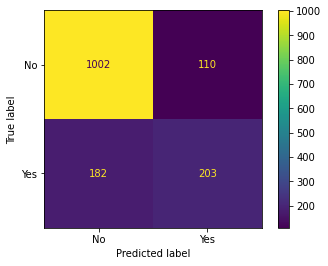

In [42]:
#plot_confusion_matrix(grid, X_test_t, y_test_t)
plot_confusion_matrix(gbc, X_test_t, y_test_t);

In [43]:
print(classification_report(y_test_t, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1112
         Yes       0.65      0.53      0.58       385

    accuracy                           0.80      1497
   macro avg       0.75      0.71      0.73      1497
weighted avg       0.80      0.80      0.80      1497



Gradient Boosting seems to have done the best for now with an 81% accuracy. Its False Positive rate still seems to be a bit high but it's able to classify most data points correctly

Adaboosting 

In [44]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.1, n_estimators = 300)
#param_grid = {'n_estimators':[50, 150, 300, 500], 'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 'algorithm':['SAMME', 'SAMME.R'], }
#grid = GridSearchCV(adc, param_grid)

In [45]:
#grid.fit(X_train_t, y_train_t)
adc.fit(X_train_t, y_train_t)
#grid.best_params_

AdaBoostClassifier(learning_rate=0.1, n_estimators=300)

In [46]:
#y_pred = grid.predict(X_test_t)
y_pred = adc.predict(X_test_t)

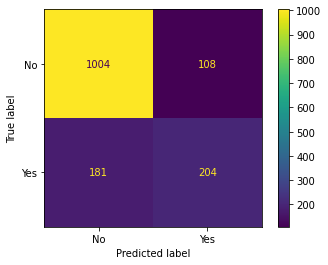

In [47]:
#plot_confusion_matrix(grid, X_test_t, y_test_t)
plot_confusion_matrix(adc, X_test_t, y_test_t);

In [48]:
print(classification_report(y_test_t, y_pred_t))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1112
         Yes       0.61      0.48      0.53       385

    accuracy                           0.79      1497
   macro avg       0.72      0.68      0.70      1497
weighted avg       0.77      0.79      0.78      1497



Adaboosting gets a 79% accuracy rate which is about as good as most of the algorithms. It still has a high false positive however.

Neural Networks

In [49]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [50]:
df_nn = df.copy()

In [51]:
df_nn['Churn'] = df_nn['Churn'].map({'No':1, 'Yes':0})


X_log = pd.get_dummies(df_nn.drop('Churn', axis = 1), drop_first=True).values
y_log = df_nn['Churn'].values

scale = MinMaxScaler()
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_log, y_log, test_size=0.25, random_state=42)
X_train_n = scale.fit_transform(X_train_n)
X_test_n = scale.transform(X_test_n)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [53]:
model = Sequential()

model.add(Dense(80, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(40, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(20, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose=1)

In [55]:
model.fit(x = X_train_n, y = y_train_n, epochs = 600, validation_data=(X_test_n, y_test_n), callbacks=[early_stop])

Epoch 1/600
141/141 [==============================] - 3s 6ms/step - loss: 0.5475 - val_loss: 0.4762
Epoch 2/600
141/141 [==============================] - 0s 3ms/step - loss: 0.5012 - val_loss: 0.4532
Epoch 3/600
141/141 [==============================] - 0s 3ms/step - loss: 0.4810 - val_loss: 0.4501
Epoch 4/600
141/141 [==============================] - 1s 4ms/step - loss: 0.4759 - val_loss: 0.4447
Epoch 5/600
141/141 [==============================] - ETA: 0s - loss: 0.460 - 1s 4ms/step - loss: 0.4618 - val_loss: 0.4385
Epoch 6/600
141/141 [==============================] - 1s 4ms/step - loss: 0.4657 - val_loss: 0.4403
Epoch 7/600
141/141 [==============================] - 1s 5ms/step - loss: 0.4490 - val_loss: 0.4358
Epoch 8/600
141/141 [==============================] - 1s 4ms/step - loss: 0.4493 - val_loss: 0.4343
Epoch 9/600
141/141 [==============================] - 1s 4ms/step - loss: 0.4532 - val_loss: 0.4355
Epoch 10/600
141/141 [==============================] - 1s 5ms/step

In [56]:
y_pred = model.predict_classes(X_test_n)

In [57]:
print(classification_report(y_test_n, y_pred ))

              precision    recall  f1-score   support

           0       0.63      0.55      0.58       385
           1       0.85      0.89      0.87      1112

    accuracy                           0.80      1497
   macro avg       0.74      0.72      0.73      1497
weighted avg       0.79      0.80      0.79      1497



Neural Net is also at a 79% accuracy rate and has that same problem of a high false positive rate.